<a href="https://colab.research.google.com/github/44REAM/AI_mahidol/blob/master/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent variable

Latent variables are variable that you not directly observed. But sometime we can construct that variables from physical reality.

For example

1. In advertising

You can collect data of person (e.g. ages, sex, what product they like to buy) and use their data to predict what they want to buy. But you cannot record their emotion and emotion may effect the decision whether they want to buy the product. And emotion is your latent variable.

2. iuyiuyi

# GMM (Gaussian mixture model)

![alt text](https://drive.google.com/uc?id=1gjilUVmv2H0mL4f9ZdrFEFpKivuUEjQr)

![alt text](https://drive.google.com/uc?id=1sfuaeJpyziHQbhIIBu38TzqwGggjzITY)

![alt text](https://drive.google.com/uc?id=1Q_AQJtgGlK0nMEhbK67aELSHGhQE39ar)

![alt text](https://drive.google.com/uc?id=1MqIULg0zfezXSioGl84JfTOmblfDlTwS)

![alt text](https://drive.google.com/uc?id=1Fe0VJt2jULPruSUxt3wuTRyDFuj8t23C)

![alt text](https://drive.google.com/uc?id=1Z4lRg2J9g-cWvGOBmGuYjEPRf1Xi7jbN)



We can build simple graphical model like this

![alt text](https://drive.google.com/uc?id=1LD2ZTFrx5iNeLN-WPUvUXuTxX1LAtX5x)

For full version of graphical model let look at wiki https://en.wikipedia.org/wiki/Mixture_model

Let 

> $z \thicksim Categorical(\pi)$ \
> $k$ = number of category

We want   $p(z = k \mid x)$

$$p(z = k \mid x) = \frac{p(x,z=k)}{p(x)}$$

$$p(z = k \mid x) = \frac{p(x \mid z=k)p(z=k)}{p(x)}$$

Find $p(x)$

$$p(x) = \sum_{all \ z} p(x,Z)$$

$$p(x) = \sum_{all \ z} p(Z)p(x \mid Z)$$

Define $p(z = k)$

$$p(z = k) = \pi_k$$

Model $p(x \mid z = k)$ as gaussian

$$p(x \mid z = k) = \mathcal{N}(x \mid \mu_k, \sigma_k)$$

you got 

$$p(z = k \mid x) = \frac{p(z=k,x)}{p(x)}$$



$$p(z = k \mid x) = \frac{\pi_k \mathcal{N}(x \mid \mu_k, \sigma_k)}{\sum_{k} \pi_k \mathcal{N}(x \mid \mu_k, \sigma_k)}$$


# PCA (Principal component analysis)

If you have many variable (feature) in your data,sometime you may want to reduced the variable (feature) that insert into your model. In otherword you may want to reduce the dimension of your feature space but still preserved the information of your data.

## Normal approach

*   Substract mean from dataset first.
*   $w$ is unit vector parallel to the axis that have most variance
*   X is two dimension matrix $m \times n$ for $m$ is number of dataset and $n$ is number of feature

You want to maximum the variance of $Xw$ subject to $w$ is unit vector

> Maximum $||Xw||^2$ \
> Subject to  $||w||^2 = 1$

You can construct lagrange function $\mathcal{L}$

$$\mathcal{L}(X,w,\lambda) = ||Xw||^2 - \lambda||w||^2$$

> for $\lambda$ is lagrange constant

you want to find $w$ so just differentiate with w.

$$\frac{ \partial ||Xw||^2}{\partial w} = \lambda \frac{\partial{||w||^2}}{\partial w}$$

$$ X^TXw = C w$$ for $C$ is some constant

Went you look to the equation it may remind you of something. It is eigenvector/eigenvalue equation.

Let $A = X^TX$

$$ Aw = Cw$$

or 

$$A = V \Lambda V^{-1}$$

> $V$ is eigenvector matrix \
> $\Lambda$ is eigenvalue matrix

So you just find the eigenvector of A and you got the solution $V$ but $V$ is the matrix of all eigenvector, so what eigenvector we should use?

Let do SVD of X

$$X = U\Sigma R^T$$

$$X^TX = R\Sigma^2 R^T$$

$$A = R\Sigma^2 R^T$$

Is similar to the $A = V \Lambda V^{-1}$

So
> $V$ = $R$ \
> $\Lambda$ = $\Sigma^2$

And you get 

$$XV = U\Sigma$$

Let look at what we want first, we want $Xw$ maximum and you know that w is in $V$

Because $U$ is orthonormal matrix the variance in collumn is = 1, we should select where $U\Sigma$ is maximum. And that mean select the eigenvector where the eigenvalue is maximum.




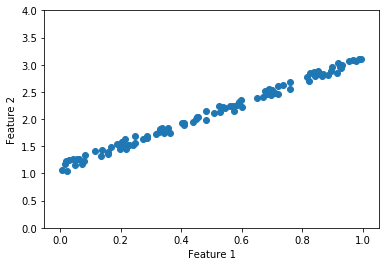

In [32]:
import numpy as np
import matplotlib.pyplot as plt

size = 100
x = np.random.uniform(0,1, size = size)

y = 2*x +1 + np.random.uniform(0,0.2, size = size)

y = y.reshape((size,1))
x = x.reshape((size,1))

dataset = np.concatenate((x,y) , axis = 1)

plt.ylim((0,4))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(x,y)
plt.show()

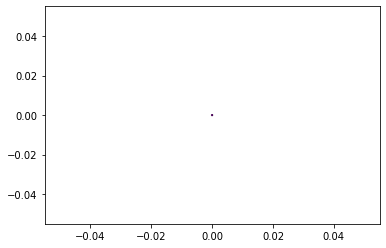

In [23]:
cov = dataset.T.dot(dataset)
eig_value, eig_vector = np.linalg.eigh(cov)

max_eig_vector = eig_vector[-1].reshape((2,1))
origin = [0], [0];
plt.quiver(*origin, max_eig_vector.reshape((2)), color=['r'], scale=100)
plt.show()


In [0]:
after_pca = dataset.dot(max_eig_vector)
inv_pca = after_pca.dot(eig_vector.T)

plot_inv_pca = inv_pca.reshape((2,size))

plt.plot(inv_pca[0], inv_pca[1])

## Bayesian PCA